Original Data Summary:
Number of data points: 104
----------------------------------------
Z-Score Method:
Outliers detected: [np.float64(-20.0), np.float64(-25.0), np.float64(120.0), np.float64(135.0)]
Data points after removal: 100
----------------------------------------
IQR Method:
Outliers detected: [np.float64(10.703823438653835), np.float64(-20.0), np.float64(-25.0), np.float64(120.0), np.float64(135.0)]
Data points after removal: 99
Data points after capping: 104
----------------------------------------


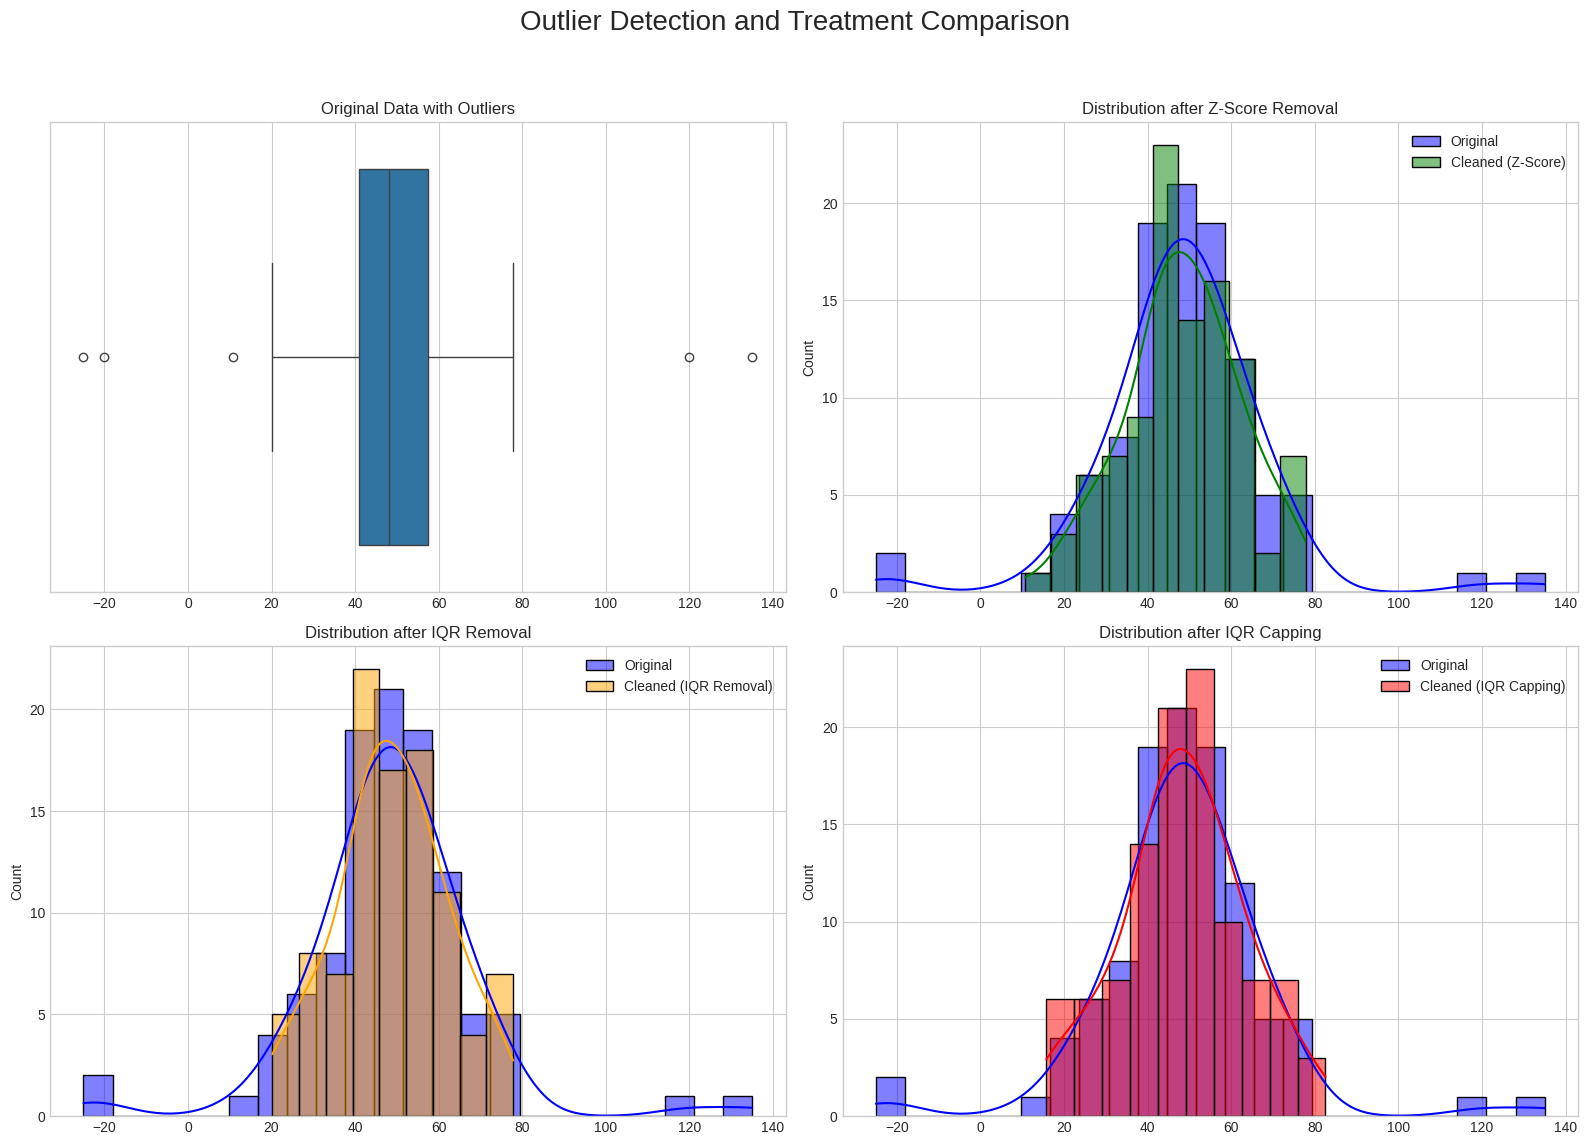

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_zscore(data, threshold=3):
    """
    Detects outliers in a dataset using the Z-score method.
    An outlier is a data point whose Z-score is greater than the threshold.
    """
    outliers = []
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

def treat_outliers_zscore(data, threshold=3):
    """
    Removes outliers from a dataset using the Z-score method.
    """
    mean = np.mean(data)
    std = np.std(data)

    # Create a boolean mask for non-outliers
    non_outlier_mask = [np.abs((i - mean) / std) <= threshold for i in data]

    # Return the filtered data
    return data[non_outlier_mask]

def detect_outliers_iqr(data):
    """
    Detects outliers in a dataset using the Interquartile Range (IQR) method.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

def treat_outliers_iqr_removal(data):
    """
    Removes outliers from a dataset using the IQR method.
    """
    _, lower_bound, upper_bound = detect_outliers_iqr(data)
    return data[(data >= lower_bound) & (data <= upper_bound)]

def treat_outliers_iqr_capping(data):
    """
    Treats outliers by capping them at the IQR boundaries (winsorizing).
    """
    _, lower_bound, upper_bound = detect_outliers_iqr(data)
    # np.clip replaces values outside the interval with the interval boundary values
    return np.clip(data, lower_bound, upper_bound)

def main():
    """
    Main function to demonstrate outlier detection and treatment.
    """
    # --- 1. Generate Sample Data ---
    np.random.seed(42)
    # Generate normally distributed data
    normal_data = np.random.randn(100) * 15 + 50
    # Add some clear outliers
    outliers_to_add = np.array([-20, -25, 120, 135])
    data_with_outliers = np.concatenate((normal_data, outliers_to_add))

    # --- 2. Z-Score Method ---
    z_score_outliers = detect_outliers_zscore(data_with_outliers)
    data_after_zscore_removal = treat_outliers_zscore(data_with_outliers)

    # --- 3. IQR Method ---
    iqr_outliers, _, _ = detect_outliers_iqr(data_with_outliers)
    data_after_iqr_removal = treat_outliers_iqr_removal(data_with_outliers)
    data_after_iqr_capping = treat_outliers_iqr_capping(data_with_outliers)

    # --- 4. Print Results ---
    print("Original Data Summary:")
    print(f"Number of data points: {len(data_with_outliers)}")
    print("-" * 40)

    print("Z-Score Method:")
    print(f"Outliers detected: {z_score_outliers}")
    print(f"Data points after removal: {len(data_after_zscore_removal)}")
    print("-" * 40)

    print("IQR Method:")
    print(f"Outliers detected: {iqr_outliers}")
    print(f"Data points after removal: {len(data_after_iqr_removal)}")
    print(f"Data points after capping: {len(data_after_iqr_capping)}")
    print("-" * 40)

    # --- 5. Visualization ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Outlier Detection and Treatment Comparison', fontsize=20)

    # Original Data
    sns.boxplot(x=data_with_outliers, ax=axes[0, 0])
    axes[0, 0].set_title('Original Data with Outliers')

    # Z-Score Removal
    sns.histplot(data_with_outliers, kde=True, ax=axes[0, 1], color='blue', label='Original')
    sns.histplot(data_after_zscore_removal, kde=True, ax=axes[0, 1], color='green', label='Cleaned (Z-Score)')
    axes[0, 1].set_title('Distribution after Z-Score Removal')
    axes[0, 1].legend()

    # IQR Removal
    sns.histplot(data_with_outliers, kde=True, ax=axes[1, 0], color='blue', label='Original')
    sns.histplot(data_after_iqr_removal, kde=True, ax=axes[1, 0], color='orange', label='Cleaned (IQR Removal)')
    axes[1, 0].set_title('Distribution after IQR Removal')
    axes[1, 0].legend()

    # IQR Capping
    sns.histplot(data_with_outliers, kde=True, ax=axes[1, 1], color='blue', label='Original')
    sns.histplot(data_after_iqr_capping, kde=True, ax=axes[1, 1], color='red', label='Cleaned (IQR Capping)')
    axes[1, 1].set_title('Distribution after IQR Capping')
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


if __name__ == '__main__':
    main()
